In [4]:
import pandas as pd
# train Data
trainData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/train.csv")
# test Data
testData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/test.csv")

In [5]:
trainData.sample(frac=1).head(5)

,Content,Label
364,on seeing the outrageous previews for bulworth...,pos
466,""" i've been told by several people , 'you're ...",pos
820,titanic is so close to being the perfect movie...,pos
6,"edward zwick's "" the siege "" raises more quest...",pos
1085,plot : something about a bunch of kids going i...,neg


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8,sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['Content'].values.astype('U'))
test_vectors = vectorizer.transform(testData['Content'].values.astype('U'))

In [8]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [9]:
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Training time: 6.532639s; Prediction time: 0.694587s
positive:  {'precision': 0.9191919191919192, 'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100}
negative:  {'precision': 0.9108910891089109, 'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100}


In [18]:
data = pd.read_csv(r'C:\Users\Reina\Desktop\demonitization.csv')
data.head()

,Unnamed: 0,Date,User,Tweet
0,0,2017-11-07 23:53:21+00:00,badri_rama,Any news on whether RBI is done counting? #Dem...
1,1,2017-11-07 23:49:21+00:00,asheeshcalla1,"#Demonitization if 1+1=2,can government give t..."
2,2,2017-11-07 20:36:15+00:00,Law_N_Tennis,I don’t have old currencies now but i have unf...
3,3,2017-11-07 20:12:50+00:00,mangalhazra3,#DemonetisationAnniversary Chalo ek baar fir s...
4,4,2017-11-07 20:01:29+00:00,I_Shubh2,#Demonitization\nHow many of u r waiting for 8...


In [21]:
data.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')

In [36]:
text_df=data.drop(['Unnamed: 0', 'Date', 'User',], axis=1)
text_df.head()

def classifer(text):
    review_vector = vectorizer.transform([text]) 
    return classifier_linear.predict(review_vector)

In [37]:
text_df['Label'] =text_df['Tweet'].apply(classifer)

In [39]:
text_df.head(20)

,Tweet,Label
0,Any news on whether RBI is done counting? #Dem...,[neg]
1,"#Demonitization if 1+1=2,can government give t...",[pos]
2,I don’t have old currencies now but i have unf...,[neg]
3,#DemonetisationAnniversary Chalo ek baar fir s...,[neg]
4,#Demonitization\nHow many of u r waiting for 8...,[pos]
5,Let's celebrate the Golden Day of our History....,[pos]
6,Ah! What a bright sunny day?\nA year back we l...,[neg]
7,Indian Halloween:\n8th November\n8 PM\nBe prep...,[neg]
8,So what's Trending tomorrow #Demonitization #a...,[neg]
9,Happy #Demonitization Diwas!\nOne year anniver...,[pos]


Text(0.5, 1.0, 'Distribution of sentiments')

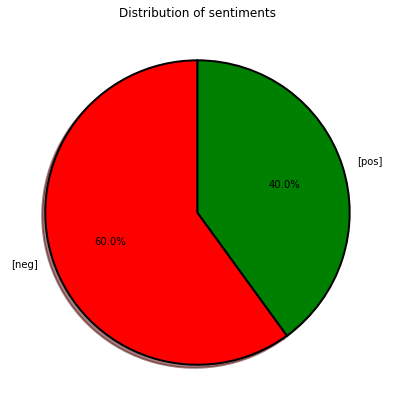

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,7))
colors = ("red", "green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['Label'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = None, label='')
plt.title('Distribution of sentiments')